<a href="https://colab.research.google.com/github/R-Owino/HYPOTHYROIDISM-CLASSIFICATION-IN-PATIENTS/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2022_04_Rehema_Owino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Predicting hypothyroidism in patients based on symptoms.

## 1. Defining the Question
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success
Use random forest and SVM techniques for prrediction and choose the most favourable one. 

### c) Understanding the context 
Hypothyroidism is a common condition where the thyroid doesn't create and release enough thyroid hormone into a person's bloodstream. This makes the person's metabolism slow down. Also called underactive thyroid, hypothyroidism can make a person feel tired, gain weight and be unable to tolerate cold temperatures. Classifying whether or not a patient has hypothyroidism can help in reversing the trajectory of the thyroid disease, improve the symptoms and avoid lifelong consequences for the positive patients.  

### d) Recording the Experimental Design
- Load and read the dataset. 
- Perform EDA.
- Implement the solution using random forests.
- Challenge the solution using SVM technique.

### e) Data Relevance
The data provided is relevant for the classification task.

## 2. Reading the Data

In [100]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('All libraries are imported')

All libraries are imported


In [101]:
# Loading the Dataset
url = 'https://drive.google.com/file/d/16JjcwAmu2_bHNtb0ZdkOaJ_QW1lD88HK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id='+ file_id
df = pd.read_csv(dwn_url)
df.columns = df.columns.str.lower()

## 3. Checking the Data

In [102]:
# Determining the no. of records in our dataset
print('There are ' +str(df.shape[0])+ ' rows and ' +str(df.shape[1])+ ' columns in the dataset')

There are 3163 rows and 26 columns in the dataset


In [103]:
# Previewing the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [104]:
# Previewing the bottom of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [105]:
# Checking whether each column has an appropriate datatype
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
tbg_measured                 object
tbg                          object
dtype: object

## 4. Tidying the Dataset

In [106]:
# Identifying the Missing Data
print('There are ' + str(df.isnull().sum().sum()) + ' missing values in the dataset')

There are 0 missing values in the dataset


In [107]:
# unique column values in the dataset
for col in df:
  print(df[col].unique())
  print('\n')

['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6

There are no missing data but there are ? symbols instead. To perform more operations on our data, the ? symbols need to be replaced appropriately in the respective columns.

Because all the columns are in string datatype, I will first replace the ? with 0 then fill them appropriately after changing the datatypes.

In [108]:
# replacing ? with 0 in the numerical columns
df[['age', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']] = df[['age', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']].replace(['?'],'0')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,0


A research from [this](https://https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5058901/#:~:text=Our%20results%20confirmed%20that%20females,hypothyroidism%20and%20hyperthyroidism%20than%20males.) source reveals that hypothyroidism is common in females more than in males. Therefore, the ? symbol in the sex column will be replaced with F. But, because we don't want to replace wrongly, we will first check against the pregnant column to be sure.

In [109]:
print(df.loc[df['pregnant'] == 't', 'sex'].to_markdown())

# the results below show that we have an instance of a pregnant person with unknown gender
# so we can go ahead and fill all the ? symbols with F

|      | sex   |
|-----:|:------|
|  120 | F     |
|  171 | F     |
|  248 | F     |
|  273 | F     |
|  398 | F     |
|  429 | F     |
|  430 | F     |
|  484 | F     |
|  544 | F     |
|  615 | F     |
|  720 | F     |
|  725 | F     |
|  809 | F     |
|  876 | F     |
|  970 | F     |
| 1001 | F     |
| 1052 | F     |
| 1152 | F     |
| 1219 | F     |
| 1222 | F     |
| 1258 | F     |
| 1282 | F     |
| 1362 | F     |
| 1368 | F     |
| 1449 | F     |
| 1468 | F     |
| 1523 | F     |
| 1539 | F     |
| 1561 | F     |
| 1572 | F     |
| 1579 | F     |
| 1584 | F     |
| 1588 | F     |
| 1643 | F     |
| 1662 | F     |
| 1691 | F     |
| 1697 | F     |
| 1701 | F     |
| 1799 | F     |
| 1926 | F     |
| 1954 | F     |
| 1963 | F     |
| 2058 | F     |
| 2124 | F     |
| 2156 | F     |
| 2160 | F     |
| 2181 | F     |
| 2218 | F     |
| 2249 | F     |
| 2358 | F     |
| 2362 | F     |
| 2520 | F     |
| 2554 | F     |
| 2580 | F     |
| 2737 | F     |
| 2798 | F     |
| 2826 | F    

In [110]:
# replacing the ? symbol in the sex column
df['sex'] = df['sex'].replace(['?'],'F')

Now that we have the columns with appropriate datatypes, we can fill the 0 age values with the median.

In [111]:
# changing numerical column datatypes to int/float
df[['tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']] = df[['tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']].astype(float)
df['age'] = df['age'].astype(int)

In [112]:
df['age'].replace(0, df['age'].median())

0       72
1       15
2       24
3       24
4       77
        ..
3158    58
3159    29
3160    77
3161    74
3162    56
Name: age, Length: 3163, dtype: int64

In [113]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0


In [114]:
df.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
dtype: object

In [115]:
# Checking for Outliers
def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(15,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = df[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()    


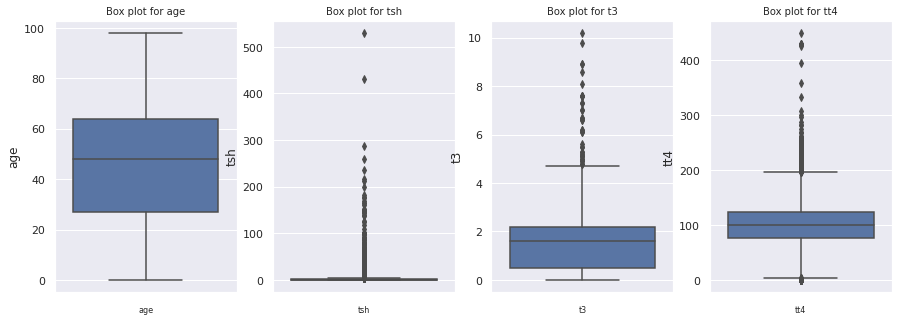

In [116]:
col_names = ['age', 'tsh', 't3', 'tt4']
box(col_names)

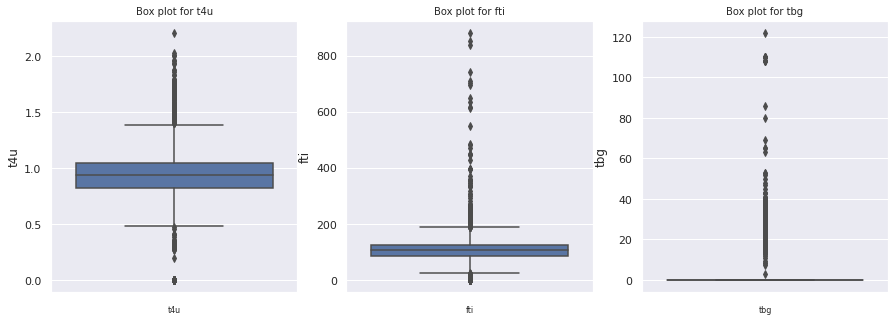

In [117]:
col_names = ['t4u', 'fti', 'tbg']
box(col_names)

Except age, most of the numeric columns have outliers. 

In [118]:
# Checking for Anomalies
df.duplicated().any()

True

In [119]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
53,hypothyroid,69,F,f,f,f,f,f,f,f,...,y,0.8,y,53.0,y,0.86,y,61.0,n,0.0
66,hypothyroid,62,M,f,f,f,f,f,f,f,...,y,0.4,y,10.0,y,1.00,y,10.0,n,0.0
124,hypothyroid,77,F,f,f,f,f,f,f,f,...,y,0.5,y,33.0,y,0.67,y,49.0,n,0.0
128,hypothyroid,79,F,f,f,f,f,f,f,f,...,y,1.6,y,47.0,y,0.97,y,48.0,n,0.0
131,hypothyroid,50,F,t,f,f,f,f,f,f,...,n,0.0,y,55.0,y,0.93,y,60.0,n,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,...,y,3.1,y,107.0,y,1.05,y,103.0,n,0.0
3055,negative,33,F,f,f,f,f,f,f,f,...,y,0.8,y,88.0,y,1.02,y,86.0,n,0.0
3066,negative,74,F,t,f,f,f,f,f,f,...,y,1.8,y,126.0,y,1.18,y,107.0,n,0.0
3111,negative,89,M,f,f,f,f,f,f,f,...,y,0.9,y,82.0,y,0.80,y,103.0,n,0.0


In [120]:
# drop duplicate rows
df.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.7,y,86.0,y,0.91,y,95.0,n,0.0
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.8,y,99.0,y,1.01,y,98.0,n,0.0
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.6,y,71.0,y,0.68,y,104.0,n,0.0
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.1,y,65.0,y,0.48,y,137.0,n,0.0


In [22]:
# Renaming the t/f and y/n to true/false and yes/no for better visual interpretation
cols = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg']

for val in cols:
  df = df[cols].replace('f','false').replace('t','true').replace('n','no').replace('y','yes')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,false,false,false,false,false,false,false,...,yes,0.6,yes,15.0,yes,1.48,yes,10.0,no,0.0
1,hypothyroid,15,F,true,false,false,false,false,false,false,...,yes,1.7,yes,19.0,yes,1.13,yes,17.0,no,0.0
2,hypothyroid,24,M,false,false,false,false,false,false,false,...,yes,0.2,yes,4.0,yes,1.00,yes,0.0,no,0.0
3,hypothyroid,24,F,false,false,false,false,false,false,false,...,yes,0.4,yes,6.0,yes,1.04,yes,6.0,no,0.0
4,hypothyroid,77,M,false,false,false,false,false,false,false,...,yes,1.2,yes,57.0,yes,1.28,yes,44.0,no,0.0


## 5. Exploratory Analysis

###Univariate Analysis

In [23]:
# Bar chart function for displaying values associated with categorical data
def bar(column, figsize):
  plt.figure(figsize = figsize)
  df[column].value_counts().plot.bar()
  plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

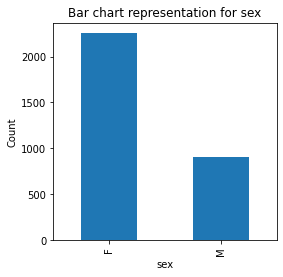

In [24]:
# bar chart representation for gender representation
bar('sex', (4,4))

# more females were tested for thyroid symptoms

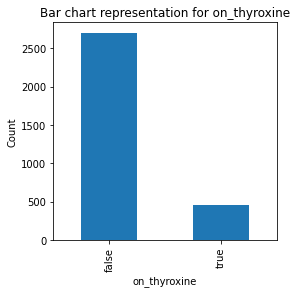

In [25]:
# bar chart representation for on_thyroxine
bar('on_thyroxine', (4,4))

# most patients were not on thyroxine

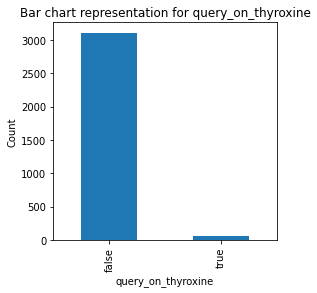

In [26]:
# bar chart representation for query_on_thyroxine
bar('query_on_thyroxine', (4,4))

# most patients did not have a question on thyroxine

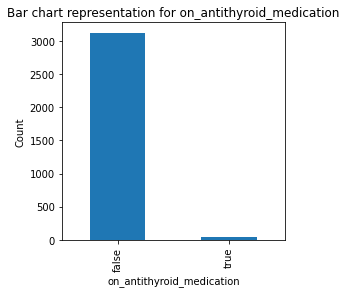

In [27]:
# bar chart representation for on_antithyroid_medication
bar('on_antithyroid_medication', (4,4))

# most patients were not on any antithyroid medication

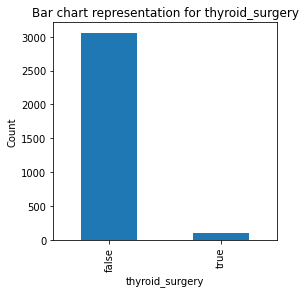

In [28]:
# bar chart representation for thyroid_surgery
bar('thyroid_surgery', (4,4))

# most patients have never had a thyroid surgery 

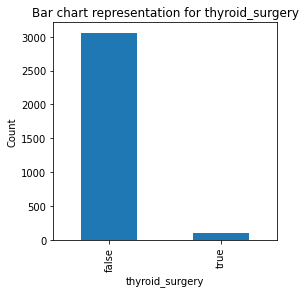

In [29]:
# bar chart representation for thyroid_surgery
bar('thyroid_surgery', (4,4))

# most patients have never had a thyroid surgery 

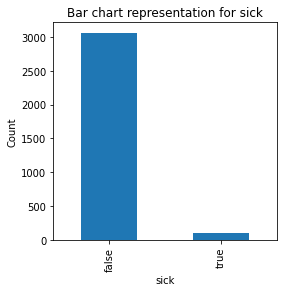

In [30]:
# bar chart representation for sick
bar('sick', (4,4))

# most patients are not sick

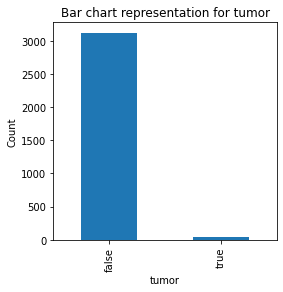

In [31]:
# bar chart representation for tumor
bar('tumor', (4,4))

# most patients do not have a tumor

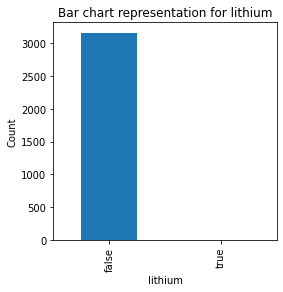

In [32]:
# bar chart representation for thyroid_surgery
bar('lithium', (4,4))

# most patients have no lithium

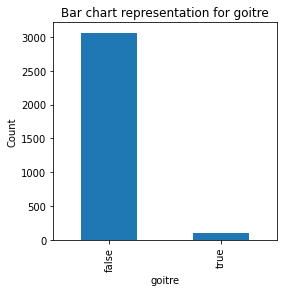

In [33]:
# bar chart representation for goitre
bar('goitre', (4,4))

# most patients do not have goitre

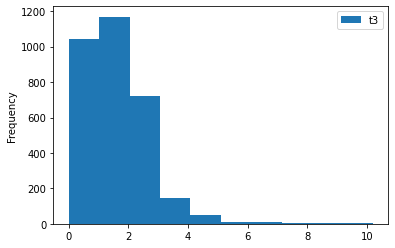

In [34]:
# Histogram representation for t3 and t3_measured

df.plot( x='t3_measured', y='t3', kind='hist')

# most patients' T3 results ranged between 1 and 2

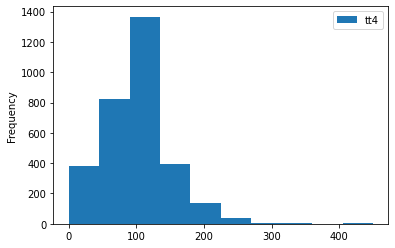

In [35]:
# Histogram representation for tt4 and tt4_measured

df.plot( x='tt4_measured', y='tt4', kind='hist')

# most patients' TT4 results ranged between 95 and 130

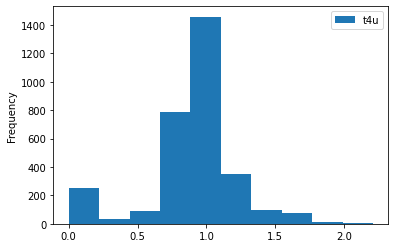

In [36]:
# Histogram representation for t4u and t4u_measured

df.plot( x='t4u_measured', y='t4u', kind='hist')

# most patients' T4U results ranged between 0.9 and 1.2

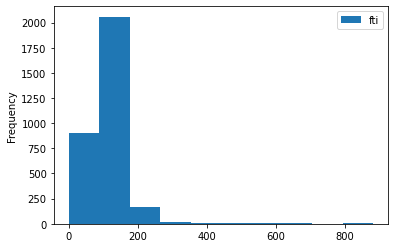

In [37]:
# Histogram representation for fti and fti_measured

df.plot( x='fti_measured', y='fti', kind='hist')

# most patients' FTI results ranged between 100 and 180

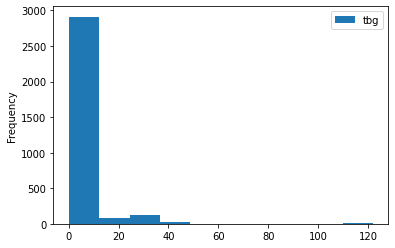

In [38]:
# Histogram representation for tbg and tbg_measured

df.plot( x='tbg_measured', y='tbg', kind='hist')

# most patients' TBG results ranged between 0 and 10

###Bivariate Analysis

Numerical and numerical

In [39]:
# scatter plot function
def plotscatter(column1, column2):
  plt.scatter(df[column1], df[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Scatter plot for {} and {}'.format(column1, column2))
  return plt.show()

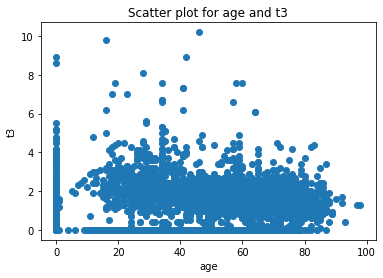

In [40]:
plotscatter('age', 't3')

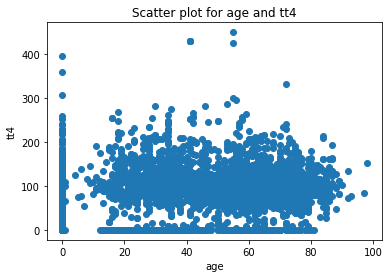

In [41]:
plotscatter('age', 'tt4')

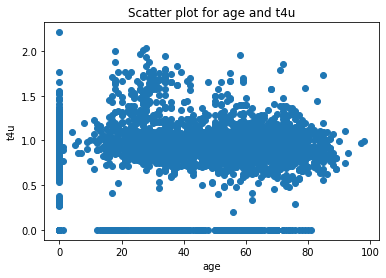

In [42]:
plotscatter('age', 't4u')

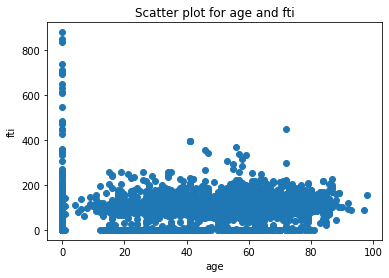

In [43]:
plotscatter('age', 'fti')

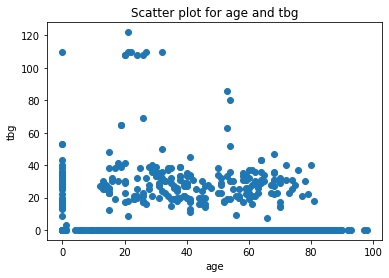

In [44]:
plotscatter('age', 'tbg')

In [45]:
# correlation between the variables
df.corr()

,age,tsh,t3,tt4,t4u,fti,tbg
age,1.000000,0.010522,-0.087559,-0.000871,0.023197,-0.037211,-0.083220
tsh,0.010522,1.000000,-0.085072,-0.220293,0.095537,-0.186038,-0.052500
t3,-0.087559,-0.085072,1.000000,0.502813,0.457418,0.336268,-0.302469
tt4,-0.000871,-0.220293,0.502813,1.000000,0.599128,0.763978,-0.441062
t4u,0.023197,0.095537,0.457418,0.599128,1.000000,0.204452,-0.618106
fti,-0.037211,-0.186038,0.336268,0.763978,0.204452,1.000000,-0.388026
tbg,-0.083220,-0.052500,-0.302469,-0.441062,-0.618106,-0.388026,1.000000


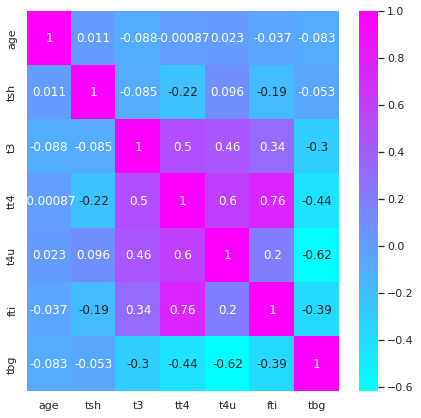

In [46]:
# correlation heatmap
sns.set(rc={'figure.figsize':(7, 7)})
df_plot = sns.heatmap(df.corr(), cmap="cool", annot=True)
plt.show()

Categorical and Categorical 


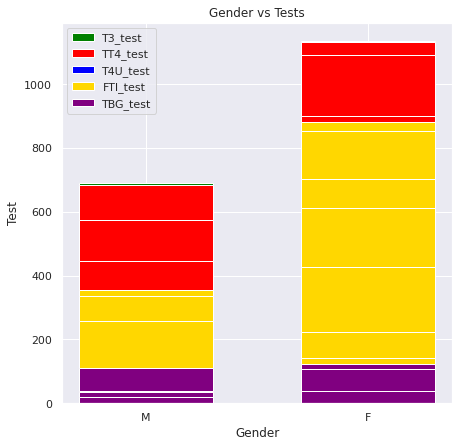

In [47]:
# stacked column chart for test results vs sex
sex = df.sex.values
t3_test = np.array(df.t3.values)
tt4_test = np.array(df.tt4.values)
t4u_test = np.array(df.t4u.values)
fti_test = np.array(df.fti.values)
tbg_test = np.array(df.tbg.values)

x = [gender for gender in sex]

plt.bar(x, t3_test, label='T3_test', width = 0.6, color = 'green', bottom = tbg_test+fti_test+tt4_test)
plt.bar(x, tt4_test, label='TT4_test', width = 0.6, color = 'red', bottom = tbg_test+fti_test)
plt.bar(x, t4u_test, label='T4U_test', width = 0.6, color = 'blue', bottom = tbg_test+fti_test)
plt.bar(x, fti_test, label='FTI_test', width = 0.6, color = 'gold', bottom = tbg_test)
plt.bar(x, tbg_test, label='TBG_test', width = 0.6, color = 'purple')

# Labeling our y axis
plt.ylabel("Test")

# Labeling our x axis
plt.xlabel("Gender")

# Creating a key/legend for our chart
plt.legend(loc="upper left")

# Adding a title
plt.title('Gender vs Tests')

# Displaying our chart
plt.show()

In [48]:
df.describe()

,age,tsh,t3,tt4,t4u,fti,tbg
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,43.941195,5.046782,1.513531,100.281031,0.901502,106.386310,2.571483
std,25.235169,22.160083,1.191836,52.588757,0.341286,65.607474,10.204298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.500000,76.000000,0.820000,85.000000,0.000000
50%,48.000000,0.400000,1.600000,100.000000,0.940000,105.000000,0.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


###Multivariate analysis

In [51]:
# To perform multivariate analysis, the categorical columns need to be converted to numerical
# To achieve this, I will use get_dummies function to transform the columns

cat_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured', 'fti_measured', 'tbg_measured']

df = pd.get_dummies(df, columns = cat_cols)
df.head()

,status,age,tsh,t3,tt4,t4u,fti,tbg,sex_F,sex_M,...,t3_measured_no,t3_measured_yes,tt4_measured_no,tt4_measured_yes,t4u_measured_no,t4u_measured_yes,fti_measured_no,fti_measured_yes,tbg_measured_no,tbg_measured_yes
0,hypothyroid,72,30.0,0.6,15.0,1.48,10.0,0.0,0,1,...,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15,145.0,1.7,19.0,1.13,17.0,0.0,1,0,...,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24,0.0,0.2,4.0,1.00,0.0,0.0,0,1,...,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24,430.0,0.4,6.0,1.04,6.0,0.0,1,0,...,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77,7.3,1.2,57.0,1.28,44.0,0.0,0,1,...,0,1,0,1,0,1,0,1,1,0


Discriminant analysis

In [52]:
# Dividing dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. 
X = df.drop('status', axis = 1)
y = df['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [55]:
# Training and making predictions using random forest classifier 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [56]:
# Evaluating the performance 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 16  10]
 [ 17 590]]
Accuracy 0.957345971563981


Performing LDA with 1 component gives us an accuracy of 95.73%

## 6. Implementing the Solution

Decision Trees: Random forests, Ada boosted trees, and gradient boosted trees.

In [58]:
# splitting into feature and target
test_features = df.drop('status', axis = 1).columns
X = np.array(df.drop('status', axis = 1))
y = np.array(np.where(df['status'] == 'hypothyroid',0,1))

# Standardizing
X = sc.fit_transform(X)

# splitting into train and test sets
from sklearn.model_selection import KFold,GridSearchCV
fold = KFold(n_splits=5)
count=1
for train_index,test_index in fold.split(X):
  print('training model',count)
X_train,X_test=X[train_index],X[test_index]
y_train,y_test=y[train_index],y[test_index]

training model 1
training model 1
training model 1
training model 1
training model 1


###Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

# training the model
clf = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_split = 20, random_state=0)
clf = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = clf.predict(X_test)

# comparing
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,632.0,632.000000
mean,1.0,0.995253
std,0.0,0.068788
min,1.0,0.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,1.000000


In [60]:
# Evaluating performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[  0   0]
 [  3 629]]
Accuracy 0.995253164556962


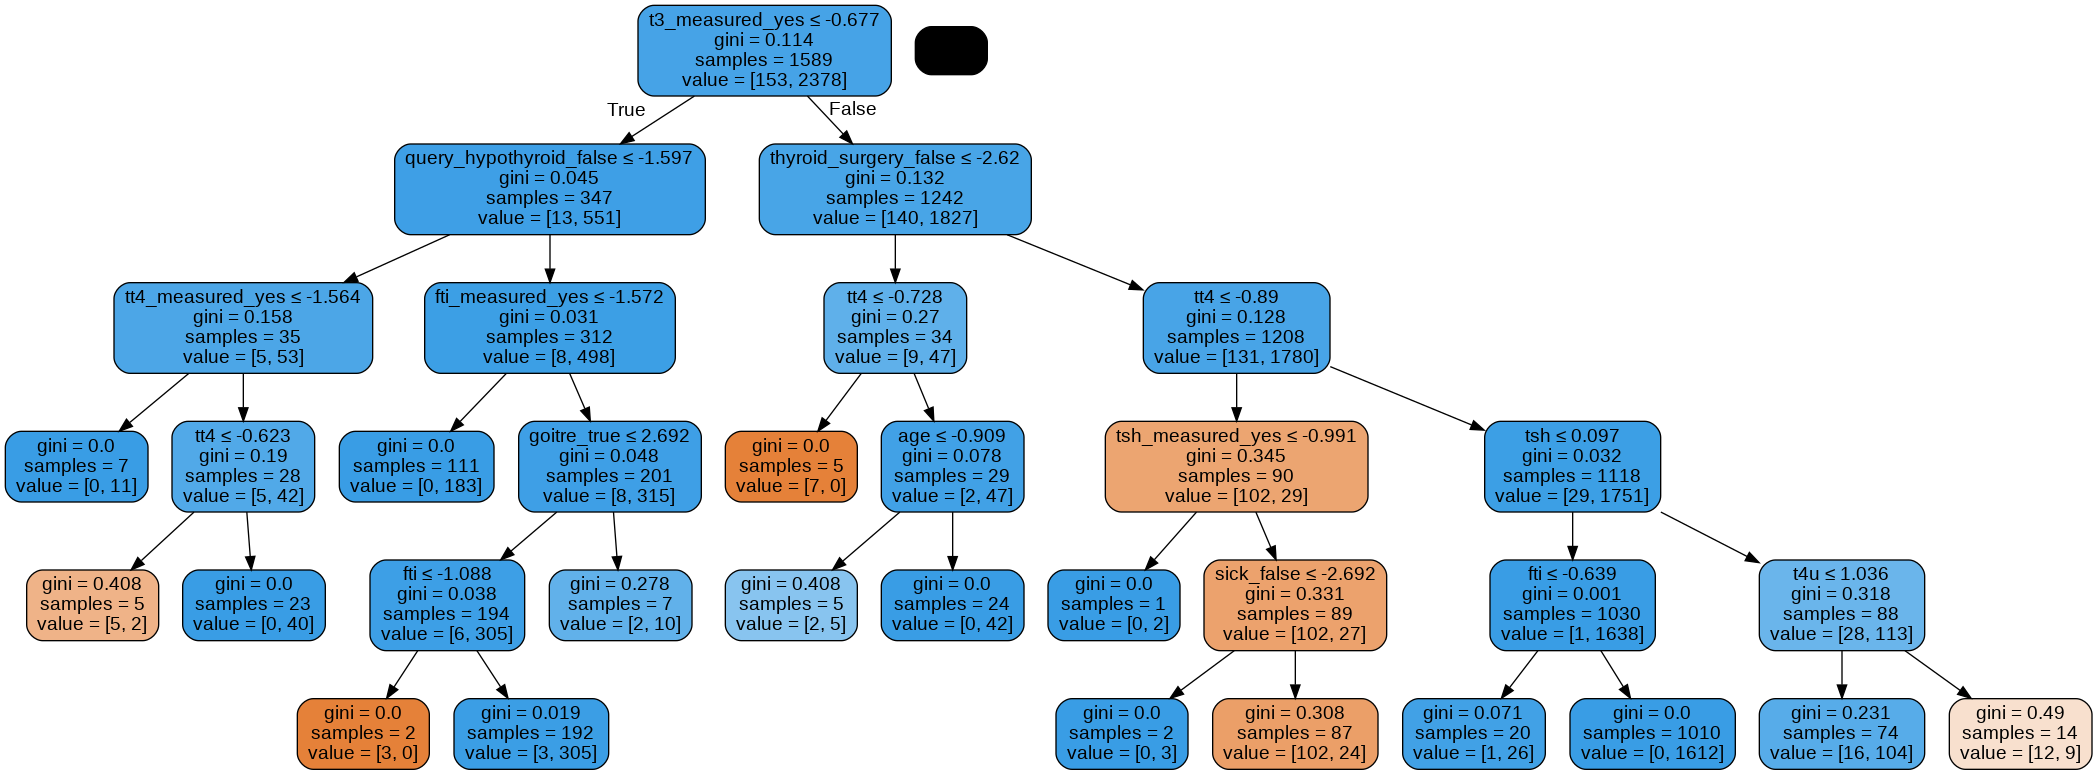

In [61]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = clf.estimators_[80]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

The random forest model has a very high accuracy of 99.52%. The root node is t3_measured_yes(yes responses for T3 measurements). The gini value is 0.114 and the samples tested are 1589.

In [62]:
# get the important fearures 

importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 

# sorting the values in descending order, since we want the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('tsh', 0.05), ('t3', 0.0), ('tt4', 0.82), ('t4u', 0.04), ('fti', 0.03), ('tbg', 0.0), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_false', 0.0), ('on_thyroxine_true', 0.0), ('query_on_thyroxine_false', 0.0), ('query_on_thyroxine_true', 0.0), ('on_antithyroid_medication_false', 0.0), ('on_antithyroid_medication_true', 0.0), ('thyroid_surgery_false', 0.0), ('thyroid_surgery_true', 0.0), ('query_hypothyroid_false', 0.0), ('query_hypothyroid_true', 0.0), ('query_hyperthyroid_false', 0.0), ('query_hyperthyroid_true', 0.0), ('pregnant_false', 0.0), ('pregnant_true', 0.0), ('sick_false', 0.02), ('sick_true', 0.0), ('tumor_false', 0.0), ('tumor_true', 0.0), ('lithium_false', 0.0), ('lithium_true', 0.0), ('goitre_false', 0.0), ('goitre_true', 0.0), ('tsh_measured_no', 0.0), ('tsh_measured_yes', 0.01), ('t3_measured_no', 0.0), ('t3_measured_yes', 0.01), ('tt4_measured_no', 0.0), ('tt4_measured_yes', 0.0), ('t4u_measured_no', 0.0), ('t4u_measured_yes', 0.0), ('fti_measured_no',

In [63]:
# building a model with the first 8 most important features to see the score difference

# splitting into feature and target
test_features = df[['tt4', 'tsh', 't4u', 'fti', 'sick_false', 'age', 'tsh_measured_yes', 't3_measured_yes']]
X = test_features
y = np.where(df['status'] == 'hypothyroid',0,1)

# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [64]:
# training the model
clf = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_split = 20, random_state=0)
clf = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = clf.predict(X_test)

# comparing
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.960506,0.957346
std,0.194922,0.202236
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [65]:
# Evaluating performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 23   2]
 [  4 604]]
Accuracy 0.990521327014218


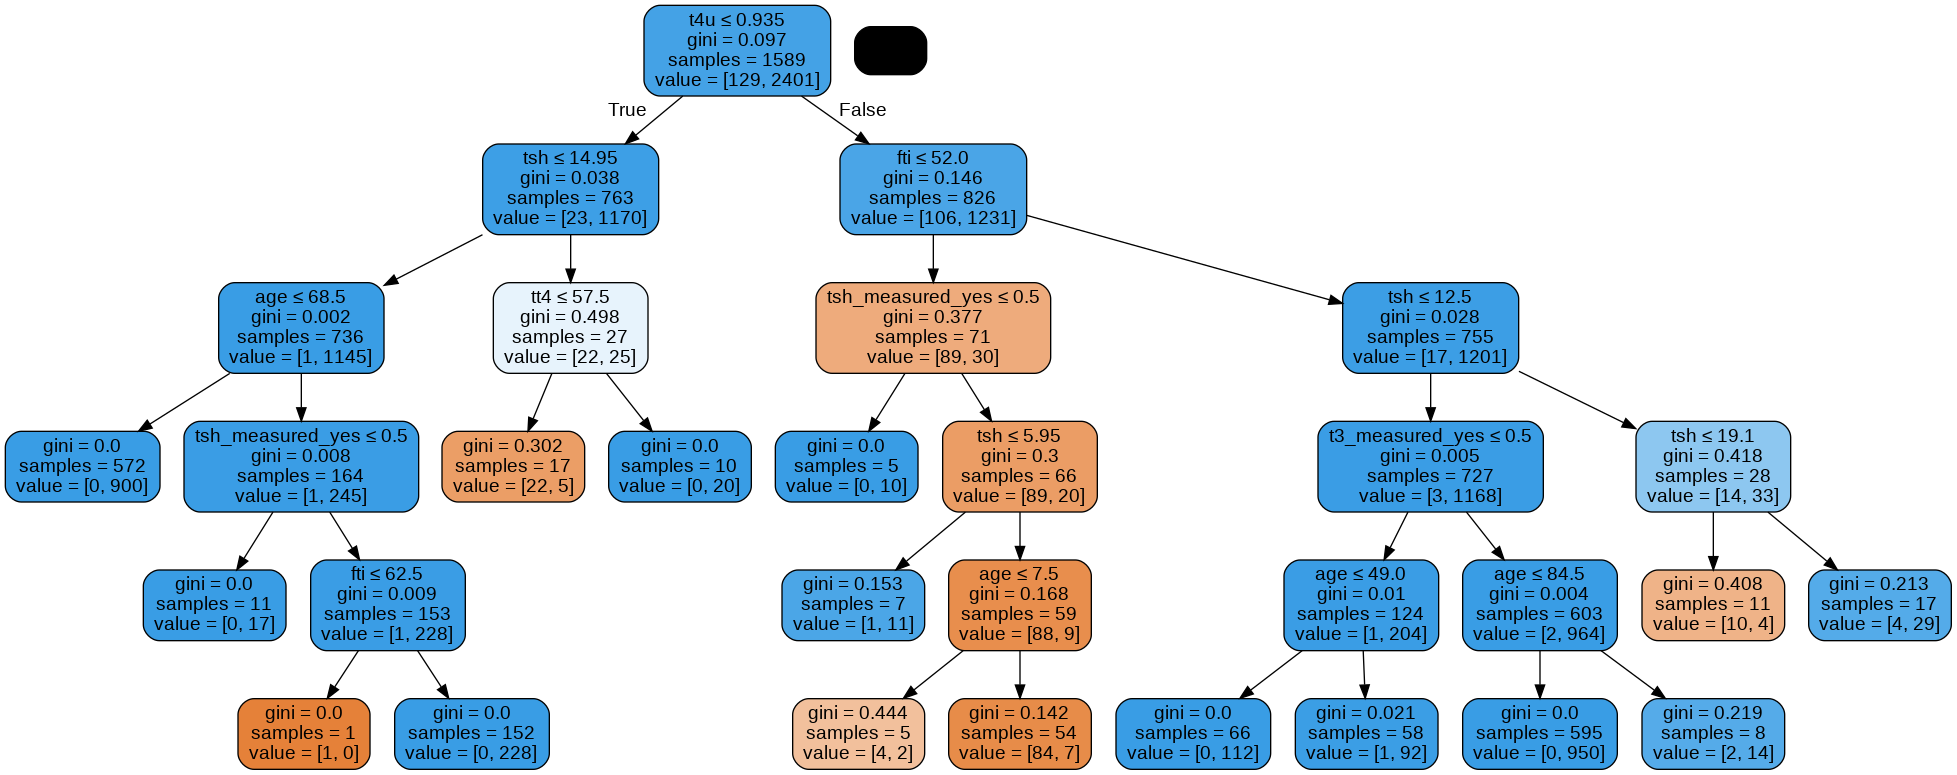

In [66]:
# looking at a random tree

dot_data = StringIO()
# pick a specific tree from the forest
tree = clf.estimators_[80]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['tt4', 'tsh', 't4u', 'fti', 'sick_false', 'age', 'tsh_measured_yes', 't3_measured_yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid1.png')
Image(graph.create_png())

When the most important features are used, we get an accuracy score of 99.05%. The root node is T4U with a gini value of 0.097. 1589 samples have been tested.

###AdaBoosting

In [67]:
# splitting into feature and target
test_features = df[['tt4', 'tsh', 't4u', 'fti', 'sick_false', 'age', 'tsh_measured_yes', 't3_measured_yes']]
X = test_features
y = np.where(df['status'] == 'hypothyroid',0,1)

# fitting the model
from sklearn.ensemble import AdaBoostClassifier as ABC
target_number_of_trees = 100

clf = ABC(n_estimators=target_number_of_trees)
clf = clf.fit(X_train, y_train)

# making prediction 
y_pred_clf = clf.predict(X_test)

# Evaluating performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 23   2]
 [  4 604]]
Accuracy 0.990521327014218


Ada boosting gives us the same accuracy score as random tree classifier model, 99.05%

###Gradient Boosting

In [68]:
# splitting into feature and target
test_features = df[['tt4', 'tsh', 't4u', 'fti', 'sick_false', 'age', 'tsh_measured_yes', 't3_measured_yes']]
X = test_features
y = np.where(df['status'] == 'hypothyroid',0,1)

# fitting the model
from sklearn.ensemble import GradientBoostingClassifier as GBC
target_number_of_trees = 100

clf = GBC(n_estimators=target_number_of_trees)
clf = clf.fit(X_train, y_train)

# making prediction 
y_pred_clf = clf.predict(X_test)

# Evaluating performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 23   2]
 [  4 604]]
Accuracy 0.990521327014218


Gradient boosting gives the same accuracy score as the others.

## 7. Challenging the solution

###SVM technique

I will now apply SVM technique to challenge the accuracy scores given by the decision tree techniques above.

In [70]:
from sklearn.svm import SVC,LinearSVC

# Specify the input for the model
X = df[['tt4', 'tsh', 't4u', 'fti', 'sick_false', 'age', 'tsh_measured_yes', 't3_measured_yes']].to_numpy()

# Convert the data type for 'status' column from object to category
df['status'] = df['status'].astype('category')

# Convert each value in the 'status' column into a number. This will be our target column
y = df['status'].cat.codes
print(y)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


0       0
1       0
2       0
3       0
4       0
       ..
3158    1
3159    1
3160    1
3161    1
3162    1
Length: 3163, dtype: int8


Linear

In [71]:
# Fit the model
model = SVC(kernel= 'linear', gamma='auto',degree=3)
clf_model = model.fit(X_train, y_train)

# making prediction
y_pred = clf_model.predict(X_test)

# Evaluating the performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 16  10]
 [  6 601]]
Accuracy 0.9747235387045814


Polynomial

In [72]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=2,gamma=5)

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred = polyclassifier.predict(X_test)

# Evaluating the performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 17   9]
 [  6 601]]
Accuracy 0.976303317535545


RBF

In [73]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma = 5)

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)

# Evaluating the performance
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[  1  25]
 [  1 606]]
Accuracy 0.9589257503949447


## 8. Summary
From the models used in this classification task, we get the following accuracy scores with the important features:

Random forest - 99.05%

AdaBoost classifier - 99.05%

Gradient boosting classifer - 99.05%

SVM(linear) - 97.47%

SVM(polynomial) - 97.63%

SVM(rbf) - 95.89%

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
Yes

### b). Do we need other data to answer our question?
No

### c). Did we have the right question?
Yes